# Gesture Set Processing (Multi-axis Accelerometer and Gyroscope)
From the Kaggle Dataset containing Accelerometer and Gyroscope values drawn by smart
watches, we process the values contained in it.

## Step 1: Initialization

In [1]:
import pandas as pd
from caits import visualization, properties
from caits.fe import spectrogram, fft_frequencies
from caits.convert import times_like


In [2]:
data = pd.read_csv(
    "data/scratching_nose.csv"
)

data.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,-0.126,-0.151,1.467,-4.697,-70.272,-18.300
1,0.050,-0.286,1.229,4.453,-73.444,-28.426
2,0.167,-0.349,1.106,25.559,-83.204,-23.729
3,0.130,-0.285,1.056,52.277,-83.204,-15.799
4,0.268,-0.083,1.015,70.516,-73.749,-15.860


### Plot Signals

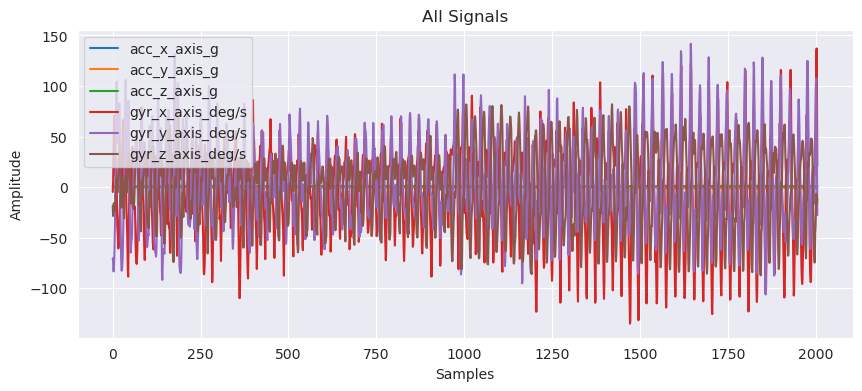

In [3]:
fig = visualization.plot_signal(
    data.values,
    title="All Signals",
    channels=data.columns.tolist()
)

### Plot Accelerometer Values

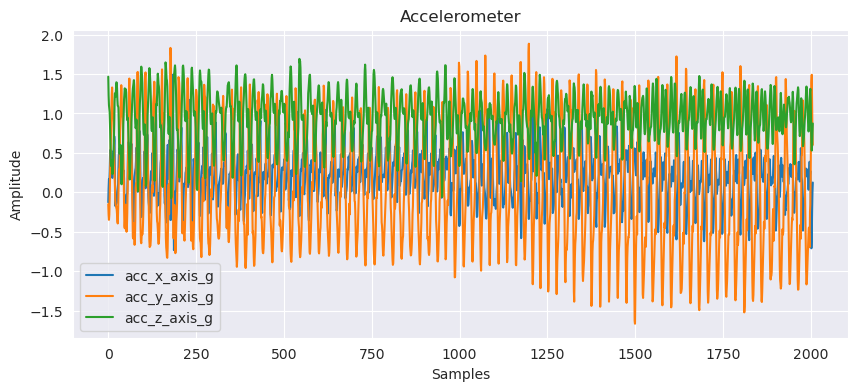

In [4]:
acc_fig = visualization.plot_signal(
    data.values[:, :3],
    title="Accelerometer",
    channels=data.columns.tolist()[:3]
)

## Step 2: Properties extraction

We will extract the magnitude of the acceleration signals (x, y, z) by calling the
appropriate function of the module

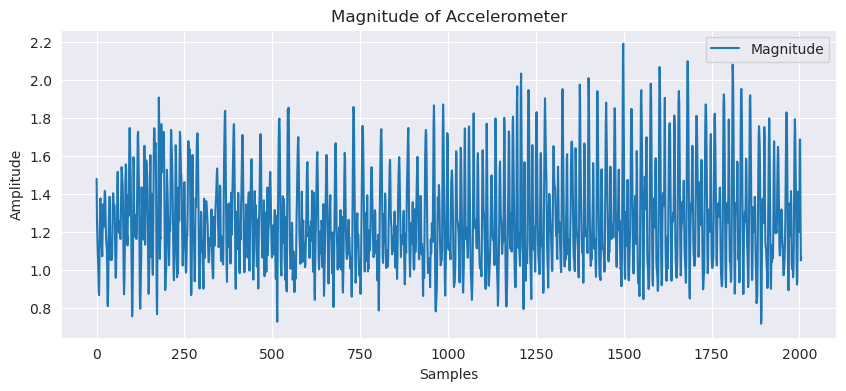

In [5]:
acc_data = data.values[:, :3]

mag = properties.magnitude_signal(acc_data)

mag_acc_fig = visualization.plot_signal(
    mag,
    title="Magnitude of Accelerometer",
    channels=["Magnitude"]
)


## Step 3: Spectrogram

(2006,)
256 (129, 16)
(129,) (16,)


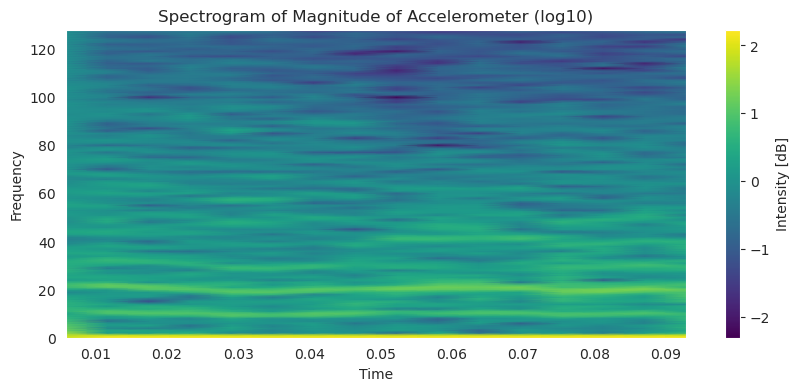

In [7]:
print(mag.shape)
spec, sr = spectrogram(y=mag.T, n_fft=256, hop_length=128)

print(sr, spec.shape)

f_new = fft_frequencies(sr=sr, n_fft=256)
times = times_like(spec, hop_length=128, n_fft=256)

print(f_new.shape, times.shape)

spec_fig = visualization.plot_spectrogram(
    spec=spec,
    f=f_new,
    x=times,
    log="log10",
    title="Spectrogram of Magnitude of Accelerometer (log10)",
    x_axis_name="Time"
    )
